<a href="https://colab.research.google.com/github/yeonghun00/stock-notes/blob/main/analysis/market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 코스피/코스닥 시총 100순위 변동 
- 1주일/1달 주도주 분석
- 상승률 변동 (20, 60, 120, 250) 
- 강한 테마/이슈 뉴스검색어와 분석으로 연속성 검증
- 조회수순? 영향력 강한 1주일 이내 공시 분석기
- 앞으로 상장할 주식 1주일 치 이슈에 부합하나
- 업황 분석기: 지난 1주 1달치 업황 상승률/ 거래대금 순위

In [1]:
!pip install exchange_calendars

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime, date
import pandas as pd
from io import StringIO
import exchange_calendars as ecals
import FinanceDataReader as fdr

XKRX = ecals.get_calendar("XKRX") # 한국 코드

Daily Community Keywords

In [4]:
url = "https://dcgle.com/galleries/kospi"
result = requests.get(url, headers = {'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36'})
bs_obj = BeautifulSoup(result.content, "html.parser")
tr = bs_obj.find_all("li", {'class':'p-4 inline-block align-bottom'})
[x.get_text().replace(' ','').replace('\n','') for x in tr]

['삼전',
 '느금창',
 '스와프',
 '코스피',
 '자폐아',
 '이지랄',
 '자폐',
 '환율',
 '표절',
 '주식',
 'ㄹㅇㅋ',
 '좆내',
 '피보나치',
 '형왔다이개새끼',
 '스플로',
 '삼프로',
 '양지사',
 '리빙이',
 '코스닥',
 '무증',
 '야선',
 '조선선재',
 '만전자',
 '공구우먼',
 'vv',
 '보합',
 '인버스',
 '성일',
 '버스충',
 '황스피',
 '좆스피',
 '한미약품',
 '홀딩스',
 '공매도',
 '이말올',
 '관련주',
 '외인',
 '생트',
 '조선업',
 '시총',
 '한남드라',
 '스와핑',
 '한미',
 '스큐',
 '할망구',
 '증권',
 '거래량',
 '개미들',
 '미장',
 '웅지',
 '어디가노',
 '좆팔육',
 '유흥',
 '통화스',
 '노스닥',
 '하닉',
 '하이닉스',
 '오겠네',
 '양전',
 '2200',
 '약속의',
 '단타',
 '매매',
 '지수는',
 '시마이',
 '통화스와프',
 '2400',
 'hpsp',
 '망구',
 '4050',
 '호로',
 '대우조선',
 '나스닥',
 '삼성전자',
 '씨발아',
 '없제',
 '수익률',
 '코갤',
 '일동',
 '동탄',
 '2300',
 '바이오',
 '산업',
 '국장',
 '에코',
 '-21',
 '아이큐',
 '통화',
 '뒤져',
 '금리',
 '안다',
 '현타',
 '비행',
 '야갤',
 'sk',
 'KF',
 '새끼야',
 '물가',
 '종목',
 '유희열']

In [5]:
kospi_df = fdr.DataReader('KS11')
kospi_df['Change'] = kospi_df['Change'] + 1
kospi_df

,Close,Open,High,Low,Volume,Change
Date,,,,,,
1981-05-01,123.60,123.60,123.60,123.60,3330000.0,1.0098
1981-05-02,123.50,123.50,123.50,123.50,2040000.0,0.9992
1981-05-04,120.60,120.60,120.60,120.60,1930000.0,0.9765
1981-05-06,120.70,120.70,120.70,120.70,1690000.0,1.0008
1981-05-07,119.30,119.30,119.30,119.30,1480000.0,0.9884
...,...,...,...,...,...,...
2022-07-14,2322.32,2316.41,2338.29,2307.69,349140000.0,0.9973
2022-07-15,2330.98,2335.12,2337.30,2293.45,319680000.0,1.0037
2022-07-18,2375.25,2350.48,2376.50,2344.12,324360000.0,1.0190


In [6]:
print('mean: ', kospi_df['Change'].mean())
print('var : ', kospi_df['Change'].var())
print('skewness : ', kospi_df['Change'].skew())
print('kurtosis : ', kospi_df['Change'].kurt())

mean:  1.0003764620281945
var :  0.00021207484522220272
skewness :  -0.056156390098475555
kurtosis :  5.502954640743094


In [7]:
import random
import math
import numpy as np

m = kospi_df['Change'].mean()
var = kospi_df['Change'].var()

sample_num = 1000
periods = 250 # 250*40

dates = pd.date_range(start=date.today(), periods=periods)
close_li = [pd.DataFrame({'Change':[random.gauss(m, math.sqrt(var)) for i in range(periods)]}, index=dates) for x in range(sample_num)]
close_li = list(map(lambda x: np.cumprod(x).rename(columns={'Change':'Close'}) * kospi_df['Close'][-1], close_li))

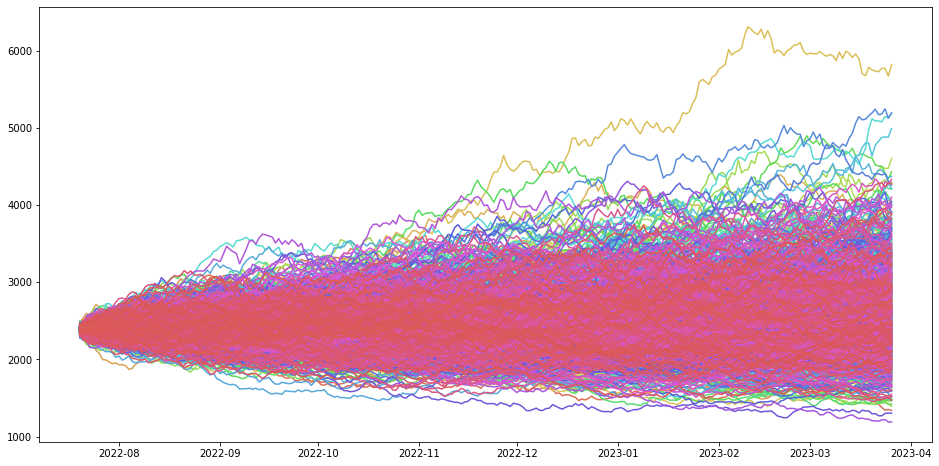

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(16, 8))
ax = plt.subplot(111)
colors = list(sns.color_palette("hls", sample_num).as_hex())

for i, j in enumerate(close_li):
  ax.plot(j['Close'], color=colors[i]) #, label=i+1)

plt.show()

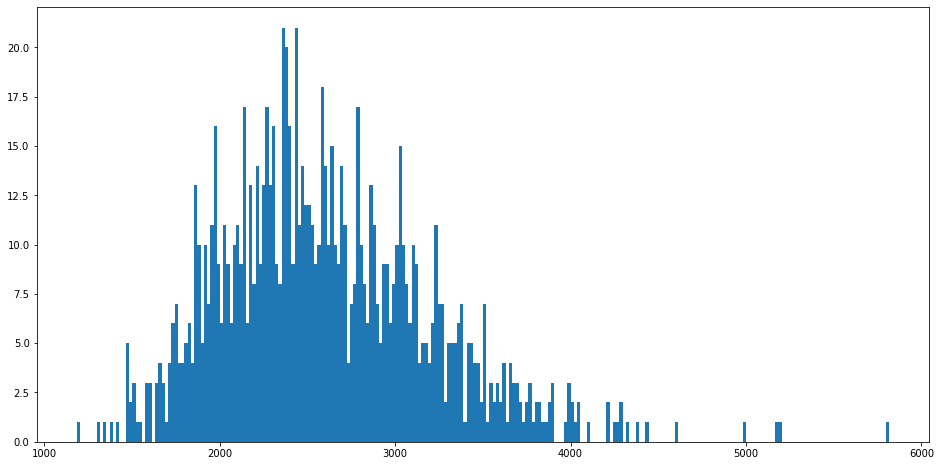

In [9]:
plt.figure(figsize=(16, 8))
end_data = [x.iloc[-1].values[0] for x in close_li]
plt.hist(end_data, bins=250)
plt.show()

In [10]:
# 95% 신뢰구간
max95 = np.mean(end_data) + (1.96 * (np.std(end_data) / math.sqrt(len(end_data))))
min95 = np.mean(end_data) - (1.96 * (np.std(end_data) / math.sqrt(len(end_data))))
print('95% Min: ', round(min95))
print('95% Max: ', round(max95))

# 평균
print('Mean: ', np.mean([round(x.iloc[-1].values[0],0) for x in close_li]))

# 중앙
print('Median: ', np.median([round(x.iloc[-1].values[0],0) for x in close_li]))

95% Min:  2569
95% Max:  2644
Mean:  2606.608
Median:  2527.0


In [11]:
kosdaq_df = fdr.DataReader('KQ11')
kosdaq_df['Change'] = kosdaq_df['Change'] + 1
kosdaq_df

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2001-01-02,557.00,502.50,559.60,502.50,201210.0,1.0593
2001-01-03,569.00,545.80,579.90,539.30,284990.0,1.0215
2001-01-04,615.10,617.70,621.50,609.00,233130.0,1.0810
2001-01-05,625.20,614.50,630.70,602.50,367230.0,1.0164
2001-01-08,650.00,614.90,657.00,614.00,358620.0,1.0397
...,...,...,...,...,...,...
2022-07-14,766.08,762.54,768.13,757.99,823120000.0,1.0038
2022-07-15,762.39,768.41,769.29,754.33,850290000.0,0.9952
2022-07-18,776.72,774.40,776.72,773.86,706230.0,1.0188


In [12]:
print('mean: ', kosdaq_df['Change'].mean())
print('var : ', kosdaq_df['Change'].var())
print('skewness : ', kosdaq_df['Change'].skew())
print('kurtosis : ', kosdaq_df['Change'].kurt())

mean:  1.000204466966967
var :  0.00025311729560469043
skewness :  -0.6905953022263873
kurtosis :  6.3266914640164895


In [13]:
m = kosdaq_df['Change'].mean()
var = kosdaq_df['Change'].var()

sample_num = 1000
periods = 250 # 250*40

dates = pd.date_range(start=date.today(), periods=periods)
close_li = 0
close_li = [pd.DataFrame({'Change':[random.gauss(m, math.sqrt(var)) for i in range(periods)]}, index=dates) for x in range(sample_num)]
close_li = list(map(lambda x: np.cumprod(x).rename(columns={'Change':'Close'}) * kosdaq_df['Close'][-1], close_li))

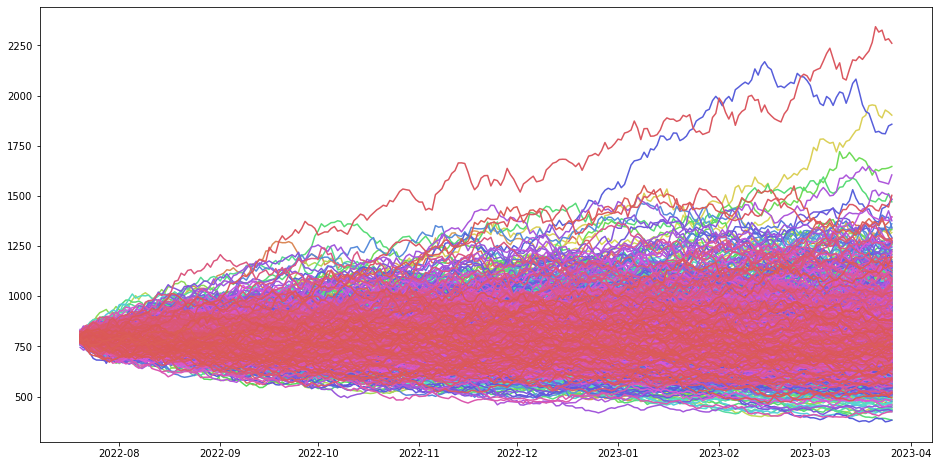

In [14]:
fig = plt.figure(figsize=(16, 8))
ax = plt.subplot(111)
colors = list(sns.color_palette("hls", sample_num).as_hex())

for i, j in enumerate(close_li):
  ax.plot(j['Close'], color=colors[i]) #, label=i+1)

plt.show()

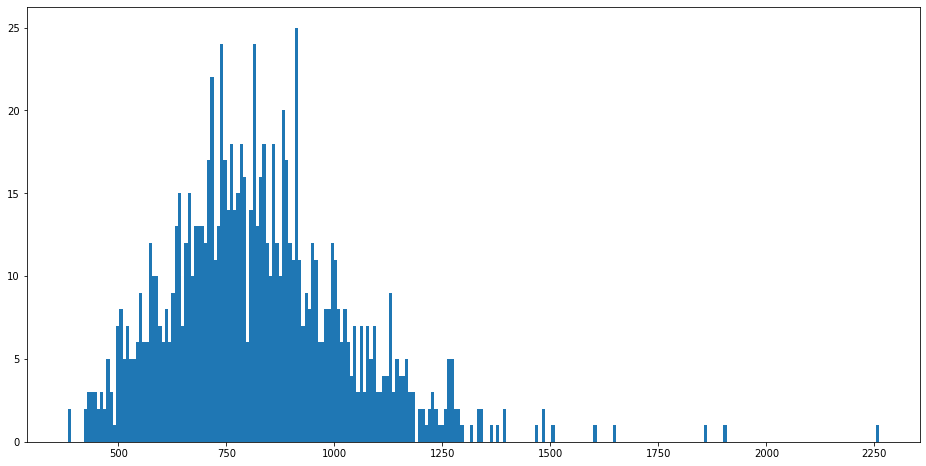

In [15]:
plt.figure(figsize=(16, 8))
end_data = [x.iloc[-1].values[0] for x in close_li]
plt.hist(end_data, bins=250)
plt.show()

In [16]:
# 95% 신뢰구간
max95 = np.mean(end_data) + (1.96 * (np.std(end_data) / math.sqrt(len(end_data))))
min95 = np.mean(end_data) - (1.96 * (np.std(end_data) / math.sqrt(len(end_data))))
print('95% Min: ', round(min95))
print('95% Max: ', round(max95))

# 평균
print('Mean: ', np.mean([round(x.iloc[-1].values[0],0) for x in close_li]))

# 중앙
print('Median: ', np.median([round(x.iloc[-1].values[0],0) for x in close_li]))

95% Min:  813
95% Max:  839
Mean:  825.944
Median:  808.5


In [17]:
market_type = {
    'all':'ALL',
    'kospi':'STK',
    'kosdaq':'KSQ'
}

def get_ranking(market, ranking_type, start_date, end_date):
  gen_url = 'http://data.krx.co.kr/comm/fileDn/GenerateOTP/generate.cmd'
  url = ''
  if ranking_type == 'highest': url = 'dbms/MDC/EASY/ranking/MDCEASY01501'
  elif ranking_type == 'traded': url = 'dbms/MDC/EASY/ranking/MDCEASY01601'
  elif ranking_type == 'marketcap': url = 'dbms/MDC/EASY/ranking/MDCEASY01701'
  start_date = start_date.strftime('%Y%m%d') if type(start_date) != str else start_date
  end_date = end_date.strftime('%Y%m%d') if type(end_date) != str else end_date
  data = {
    'locale': 'ko_KR',
    'mktId': market,
    'itmTpCd': '1',
    'itmTpCd2': '1',
    'trdDd': start_date,
    'strtDd': start_date,
    'endDd': end_date,
    'stkprcTpCd': 'Y',
    'share': '1',
    'money': '1',
    'csvxls_isNo': 'false',
    'name': 'fileDown',
    'url': url
  }
  gen_key = requests.post(gen_url, data=data).text
  down_url = 'http://data.krx.co.kr/comm/fileDn/download_csv/download.cmd'
  data = {'code':gen_key}
  r = requests.post(down_url, data=data)
  r.encoding = 'EUC-KR'
  return pd.read_csv(StringIO(r.text))

In [18]:
def get_ranking_df(start='20220613', end='20220712', freq='1D', market='kospi', ranking_type='marketcap'):
  df = pd.DataFrame()
  for d in pd.date_range(start=start, end=end, freq=freq):
    t = pd.DataFrame()
    dt = d
    if XKRX.is_session(dt) == False:
      dt = XKRX.next_open(dt).replace(tzinfo=None)
    t = get_ranking(market_type[market], ranking_type, dt.strftime('%Y%m%d'), dt.strftime('%Y%m%d'))[['순위', '종목명']]
    t['date'] = dt
    df = df.append(t, ignore_index=True)
  return df

In [19]:
# korean font
!wget 'https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKkr-hinted.zip'
!unzip "NotoSansCJKkr-hinted.zip"
!mv NotoSansCJKkr-Medium.otf /usr/share/fonts/truetype/

--2022-07-20 14:20:57--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKkr-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 74.125.195.128, 2607:f8b0:400e:c09::80
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121163981 (116M) [application/zip]
Saving to: ‘NotoSansCJKkr-hinted.zip.1’

NotoSansCJKkr-hinte 100%[===================>] 115.55M   252MB/s    in 0.5s    

2022-07-20 14:20:58 (252 MB/s) - ‘NotoSansCJKkr-hinted.zip.1’ saved [121163981/121163981]

Archive:  NotoSansCJKkr-hinted.zip
replace LICENSE_OFL.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: LICENSE_OFL.txt         
  inflating: NotoSansCJKkr-Black.otf  
  inflating: NotoSansCJKkr-Bold.otf  
  inflating: NotoSansCJKkr-DemiLight.otf  
  inflating: NotoSansCJKkr-Light.otf  
  inflating: NotoSansCJKkr-Medium.otf  
  i

In [20]:
from matplotlib import font_manager, rc
font_fname = '/usr/share/fonts/truetype/NotoSansCJKkr-Medium.otf'
font_manager.fontManager.addfont(font_fname)
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)
font_manager._rebuild()

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FixedFormatter, FixedLocator

def plot_bump(df='', n_top_ranked=10, title='Title'):
  top_sources = df[df["date"] == df["date"].max()].nsmallest(n_top_ranked, "순위")

  fig, ax = plt.subplots(figsize=(16, 8), subplot_kw=dict(ylim=(0.5, 0.5 + n_top_ranked)))
  #ax.xaxis.set_major_locator(MultipleLocator(1))
  ax.yaxis.set_major_locator(MultipleLocator(1))

  yax2 = ax.secondary_yaxis("right")
  yax2.yaxis.set_major_locator(FixedLocator(top_sources["순위"].to_list()))
  yax2.yaxis.set_major_formatter(FixedFormatter(top_sources["종목명"].to_list()))

  for k, (i, j) in enumerate(df.groupby("종목명")):
    ax.plot("date", "순위", "o-", linewidth=3, markersize=7, data=j, mfc="w")

  ax.invert_yaxis()
  ax.set(xlabel="Date", ylabel="Rank", title=title)
  plt.tight_layout()

In [22]:
from dateutil import relativedelta

t = date.today()
today = t.strftime('%Y%m%d') if XKRX.is_session(t) else XKRX.previous_open(t).replace(tzinfo=None).strftime('%Y%m%d')
w = (date.today() - relativedelta.relativedelta(weeks=1))
previous_week = w.strftime('%Y%m%d') if XKRX.is_session(w) else XKRX.next_open(w).replace(tzinfo=None).strftime('%Y%m%d')
m = (date.today() - relativedelta.relativedelta(months=1))
previous_month = m.strftime('%Y%m%d') if XKRX.is_session(m) else XKRX.next_open(m)
y = (date.today() - relativedelta.relativedelta(years=1))
previous_year = y.strftime('%Y%m%d') if XKRX.is_session(y) else XKRX.next_open(y).replace(tzinfo=None).strftime('%Y%m%d')

Market Cap Ranking Change

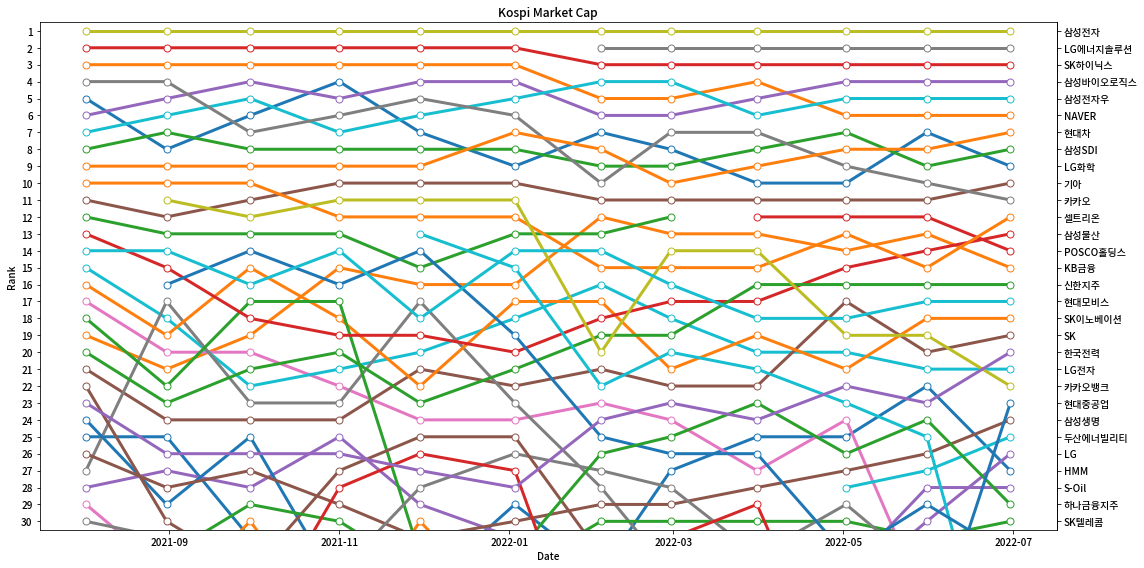

In [23]:
kospi_marketcap_ranking_df = get_ranking_df(previous_year, today, freq='1M', market='kospi', ranking_type='marketcap')
plot_bump(kospi_marketcap_ranking_df, 30, "Kospi Market Cap")

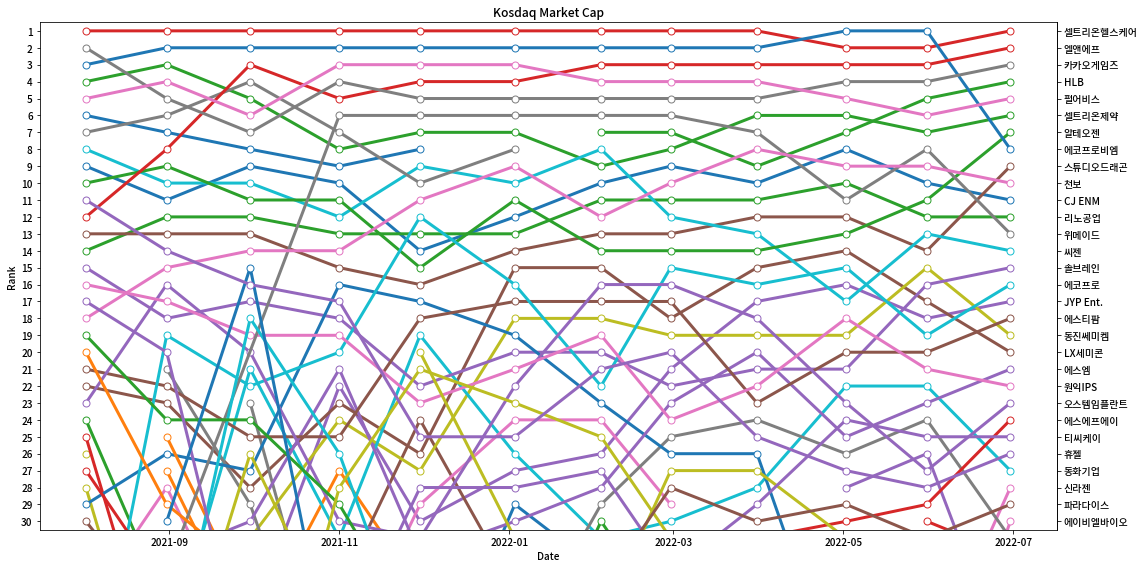

In [24]:
kosdaq_marketcap_ranking_df = get_ranking_df(previous_year, today, freq='1M', market='kosdaq', ranking_type='marketcap')
plot_bump(kosdaq_marketcap_ranking_df, 30, "Kosdaq Market Cap")

Annual King

In [25]:
get_ranking(market_type['kospi'], 'traded', previous_year, today).sort_values('등락률', ascending=False).head(10)

,순위,종목코드,종목명,시장구분,시작일기준가,종료일종가,대비,등락률,거래량_합계,거래량_일평균,거래대금_합계,거래대금_일평균
10,11,249420,일동제약,KOSPI,15800,53400,37600,237.97,774385306,3135163,35414292451200,143377702232
28,29,11700,한신기계,KOSPI,4240,8910,4670,110.14,2118037754,8575052,15214283544830,61596289655
15,16,11070,LG이노텍,KOSPI,240500,337000,96500,40.12,85198900,344935,26832111245227,108632029333
23,24,93370,후성,KOSPI,12950,17400,4450,34.36,880650134,3565385,17612672194150,71306365159
44,45,5070,코스모신소재,KOSPI,42950,53700,10750,25.03,227683471,921795,10910375630700,44171561258
37,38,52690,한전기술,KOSPI,54600,62500,7900,14.47,167714172,679005,13054154689500,52850828702
40,41,10060,OCI,KOSPI,114500,116500,2000,1.75,97809285,395989,11788330442300,47726034179
14,15,270,기아,KOSPI,85800,81600,-4200,-4.90,367722885,1488757,29902284975517,121061882492
21,22,105560,KB금융,KOSPI,51100,48500,-2600,-5.09,327355043,1325324,18305195816546,74110104520
29,30,17670,SK텔레콤,KOSPI,56333,53300,-3033,-5.38,161548836,654044,14973909640207,60623115952


In [26]:
get_ranking(market_type['kosdaq'], 'traded', previous_year, today).sort_values('등락률', ascending=False).head(10)

,순위,종목코드,종목명,시장구분,시작일기준가,종료일종가,대비,등락률,거래량_합계,거래량_일평균,거래대금_합계,거래대금_일평균
30,31,258830,세종메디칼,KOSDAQ,2040,7230,5190,254.41,1709725248,6921965,10569229047460,42790401002
28,29,5860,한일사료,KOSDAQ,2250,6160,3910,173.78,1643906809,6655493,10828080460495,43838382431
22,23,90710,휴림로봇,KOSDAQ,1050,2830,1780,169.52,5587395161,22621033,13342511517441,54018265253
18,19,53050,지에스이,KOSDAQ,2080,5180,3100,149.04,2973295642,12037634,14214983346722,57550539865
36,37,278650,노터스,KOSDAQ,3164,7540,4376,138.31,601976996,2437154,9274811492400,37549844099
0,1,112040,위메이드,KOSDAQ,30865,63200,32335,104.76,325413483,1317463,40439524731972,163722772194
1,2,66970,엘앤에프,KOSDAQ,121600,219700,98100,80.67,208803007,845356,40159548922602,162589266893
16,17,206560,덱스터,KOSDAQ,9500,16400,6900,72.63,719686069,2913709,14854543721000,60139853121
49,50,215100,로보로보,KOSDAQ,4345,7400,3055,70.31,928709087,3759956,7583083421272,30700742596
37,38,222800,심텍,KOSDAQ,23200,39350,16150,69.61,228651841,925716,9192251561800,37215593368


Montly King

In [27]:
get_ranking(market_type['kospi'], 'traded', previous_month, today).sort_values('등락률', ascending=False).head(10)

,순위,종목코드,종목명,시장구분,시작일기준가,종료일종가,대비,등락률,거래량_합계,거래량_일평균,거래대금_합계,거래대금_일평균
49,50,19170,신풍제약,KOSPI,23250,35000,11750,50.54,28110327,1222188,795083620650,34568853072
5,6,249420,일동제약,KOSPI,36050,53400,17350,48.13,80135339,3484145,3397493229500,147717096935
46,47,11000,진원생명과학,KOSPI,10800,15450,4650,43.06,59589229,2590836,826634947300,35940649883
43,44,4310,현대약품,KOSPI,4400,6270,1870,42.50,144226738,6270728,853216220790,37096357426
2,3,302440,SK바이오사이언스,KOSPI,104000,134000,30000,28.85,33047679,1436856,4280970106200,186129135052
12,13,68270,셀트리온,KOSPI,153000,184000,31000,20.26,11852689,515334,2102270864524,91403081066
41,42,1250,GS글로벌,KOSPI,3205,3750,545,17.00,259306900,11274213,912084968840,39655868210
31,32,51900,LG생활건강,KOSPI,622000,723000,101000,16.24,1643681,71464,1121688566922,48769068127
3,4,5380,현대차,KOSPI,170000,189000,19000,11.18,21079614,916505,3783689079114,164508220831
37,38,12330,현대모비스,KOSPI,202000,219000,17000,8.42,4916225,213749,1005962520500,43737500891


In [28]:
get_ranking(market_type['kosdaq'], 'traded', previous_month, today).sort_values('등락률', ascending=False).head(10)

,순위,종목코드,종목명,시장구분,시작일기준가,종료일종가,대비,등락률,거래량_합계,거래량_일평균,거래대금_합계,거래대금_일평균
44,45,257720,실리콘투,KOSDAQ,2175,4995,2820,129.66,38806023,1687218,724150648955,31484810824
24,25,258830,세종메디칼,KOSDAQ,3595,7230,3635,101.11,165482340,7194884,1033284246220,44925402010
21,22,56700,신화인터텍,KOSDAQ,2460,4720,2260,91.87,269354362,11711059,1062476450435,46194628280
3,4,205470,휴마시스,KOSDAQ,12400,23300,10900,87.90,155648186,6767312,2997847900400,130341213061
42,43,253840,수젠텍,KOSDAQ,10300,17900,7600,73.79,45235184,1966747,734129391110,31918669179
12,13,256840,한국비엔씨,KOSDAQ,7980,13150,5170,64.79,116867621,5081201,1325617126180,57635527225
36,37,376180,피코그램,KOSDAQ,26100,42700,16600,63.60,21913980,952782,791710688750,34422203859
28,29,84650,랩지노믹스,KOSDAQ,5740,9140,3400,59.23,119247860,5184690,972691061710,42290915727
16,17,64550,바이오니아,KOSDAQ,24850,39250,14400,57.95,32260729,1402640,1178287722750,51229900989
26,27,323990,박셀바이오,KOSDAQ,40400,60800,20400,50.50,18248044,793393,998415703000,43409378391


Weekly King

In [29]:
get_ranking(market_type['kospi'], 'traded', previous_week, today).sort_values('등락률', ascending=False).head(10)

,순위,종목코드,종목명,시장구분,시작일기준가,종료일종가,대비,등락률,거래량_합계,거래량_일평균,거래대금_합계,거래대금_일평균
12,13,19170,신풍제약,KOSPI,26000,35000,9000,34.62,16978209,2829702,537437109500,89572851583
2,3,249420,일동제약,KOSPI,40750,53400,12650,31.04,40069836,6678306,2014550320900,335758386817
46,47,5420,코스모화학,KOSPI,14200,18400,4200,29.58,9795334,1632556,169190696700,28198449450
7,8,11000,진원생명과학,KOSPI,12300,15450,3150,25.61,45376125,7562688,670518153150,111753025525
22,23,230,일동홀딩스,KOSPI,31350,38450,7100,22.65,9317312,1552885,338340141000,56390023500
39,40,120030,조선선재,KOSPI,141000,167500,26500,18.79,1266612,211102,196798334000,32799722333
36,37,5070,코스모신소재,KOSPI,47600,53700,6100,12.82,4096702,682784,211334870250,35222478375
28,29,1250,GS글로벌,KOSPI,3405,3750,345,10.13,80552361,13425394,295582938960,49263823160
43,44,64350,현대로템,KOSPI,18150,19950,1800,9.92,9161154,1526859,181116707250,30186117875
1,2,660,SK하이닉스,KOSPI,93300,102000,8700,9.32,20984248,3497375,2073814226200,345635704367


In [30]:
get_ranking(market_type['kosdaq'], 'traded', previous_week, today).sort_values('등락률', ascending=False).head(10)

,순위,종목코드,종목명,시장구분,시작일기준가,종료일종가,대비,등락률,거래량_합계,거래량_일평균,거래대금_합계,거래대금_일평균
5,6,258830,세종메디칼,KOSDAQ,4375,7230,2855,65.26,128432399,21405400,883862563015,147310427169
44,45,288980,모아데이타,KOSDAQ,3751,6120,2369,63.16,7213081,1202180,169416252330,28236042055
40,41,52020,에스티큐브,KOSDAQ,8000,13000,5000,62.50,16002149,2667025,177827507690,29637917948
4,5,323990,박셀바이오,KOSDAQ,40950,60800,19850,48.47,15596282,2599380,893751137550,148958522925
32,33,27830,대성창투,KOSDAQ,3050,4500,1450,47.54,49783256,8297209,202466545105,33744424184
42,43,297570,알로이스,KOSDAQ,1620,2315,695,42.90,81445561,13574260,175584926000,29264154333
27,28,44060,조광ILI,KOSDAQ,2280,3140,860,37.72,42403781,7067297,225113488830,37518914805
37,38,7390,네이처셀,KOSDAQ,19200,25800,6600,34.38,8130664,1355111,183330344600,30555057433
7,8,86520,에코프로,KOSDAQ,67500,90500,23000,34.07,8330897,1388483,682281053400,113713508900
25,26,94480,갤럭시아머니트리,KOSDAQ,6240,8040,1800,28.85,30030733,5005122,234460993680,39076832280


In [31]:
sector_dic = {'에너지': 'WI100', '화학': 'WI110', '비철금속': 'WI200', '철강': 'WI210', '건설': 'WI220', '기계': 'WI230', '조선': 'WI240', '상가,자본재': 'WI250', \
       '운송': 'WI260', '자동차': 'WI300', '화장품,의류': 'WI310', '호텔,레저': 'WI320', '미디어,교육': 'WI330', '소매(유통)': 'WI340', '필수소비재': 'WI400', \
       '건강관리': 'WI410', '은행': 'WI500', '증권': 'WI510', '보험': 'WI520', '소프트웨어': 'WI600', 'IT하드웨어': 'WI610', '반도체': 'WI620', 'IT가전': 'WI630', \
       '디스플레이': 'WI640', '전기통신서비스': 'WI700', '유틸리티': 'WI800'}

sheets = ['Index Value', 'Return', 'Valuation Ratio', 'Risk & Performance Ratio']

In [32]:
def get_sector(sector, term, current_date, pre_year=3):
  id = sector_dic[sector]
  name = 'WI26' + sector
  current_date = current_date if XKRX.is_session(current_date) else XKRX.previous_open(current_date)
  previous_date = (datetime.strptime(current_date, '%Y%m%d') - relativedelta.relativedelta(years=pre_year))
  previous_date = previous_date if XKRX.is_session(previous_date) else XKRX.next_open(previous_date)

  current_date = datetime.strptime(current_date, '%Y%m%d').strftime('%Y-%m-%d') \
  if type(current_date) == str else current_date.strftime('%Y-%m-%d')
  previous_date = datetime.strptime(previous_date, '%Y%m%d').strftime('%Y-%m-%d') \
  if type(previous_date) == str else previous_date.strftime('%Y-%m-%d')
  t = {
      'day' : '1',
      'week' : '2',
      'month' : '3',
      'quarter' : '4'
  }
  headers = {'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36'}
  url = 'https://www.wiseindex.com/DataCenter/ExportToExcel?index_ids=' + \
    id + '&index_names=' + name + '&tabs=1,2,3,4&fromDT=' + \
    previous_date + '&endDT=' + current_date + '&term=' + t[term] + '&isEnd=1'
  res = requests.get(url, headers = headers)
  xls = pd.ExcelFile(res.content)
  return xls

In [33]:
energy = get_sector('에너지', 'month', today, 3)

In [34]:
def get_sheet(elx, sheets):
  df = pd.read_excel(elx, sheets) 
  df.columns = df.iloc[0]
  df = df.iloc[::-1]
  df = df.drop(0)
  df = df[1:].set_index('일자')
  return df

In [35]:
sectors = {}
for sector in list(sector_dic):
  sectors[sector] = get_sheet(get_sector(sector, 'month', today, 3), sheets[0])

Sector Market Cap

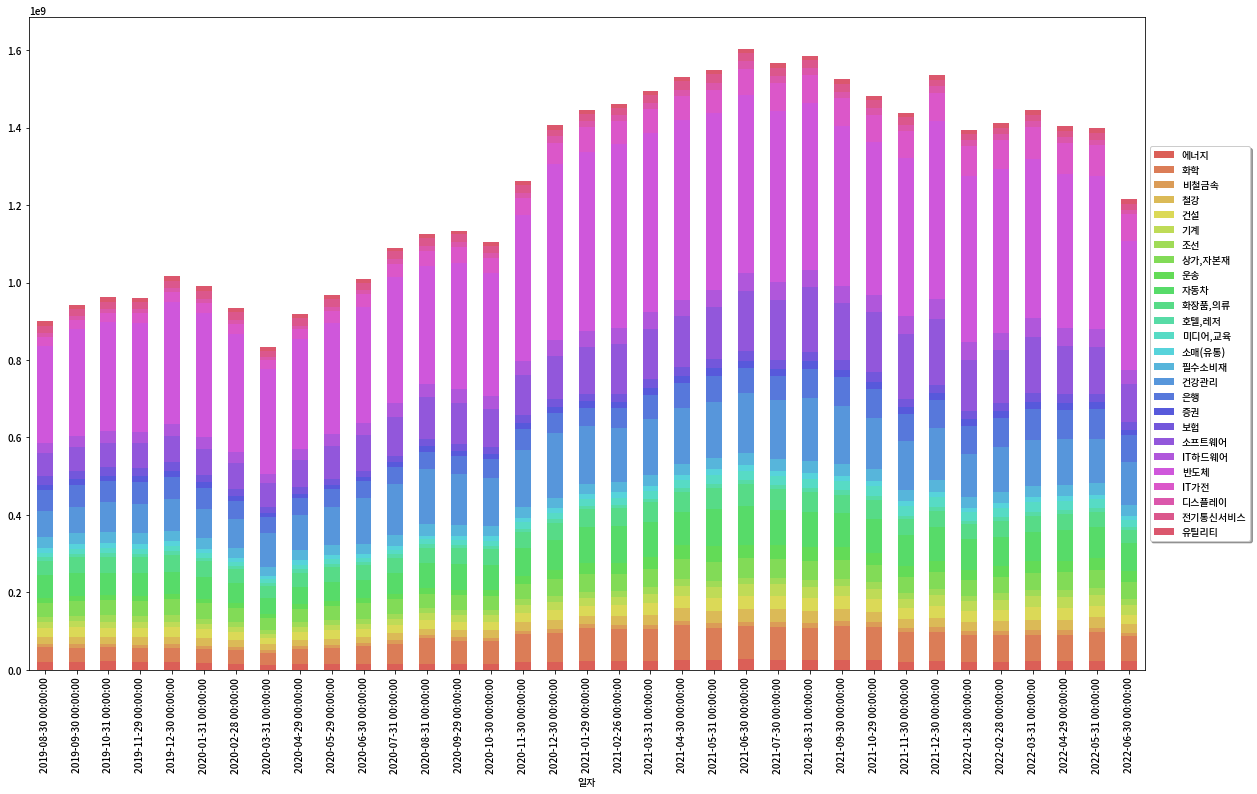

In [36]:
data = dict([(x,sectors[x]['시가총액 (백만)']) for x in sectors])

fig = plt.figure(figsize=(20, 12))
ax = plt.subplot(111)
pd.DataFrame(data).plot.bar(stacked=True, ax=ax, color=list(sns.color_palette("hls", len(sector_dic)).as_hex()))
ax.legend(loc='center left',  bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True)
plt.show()

Sector Traded Value / Market

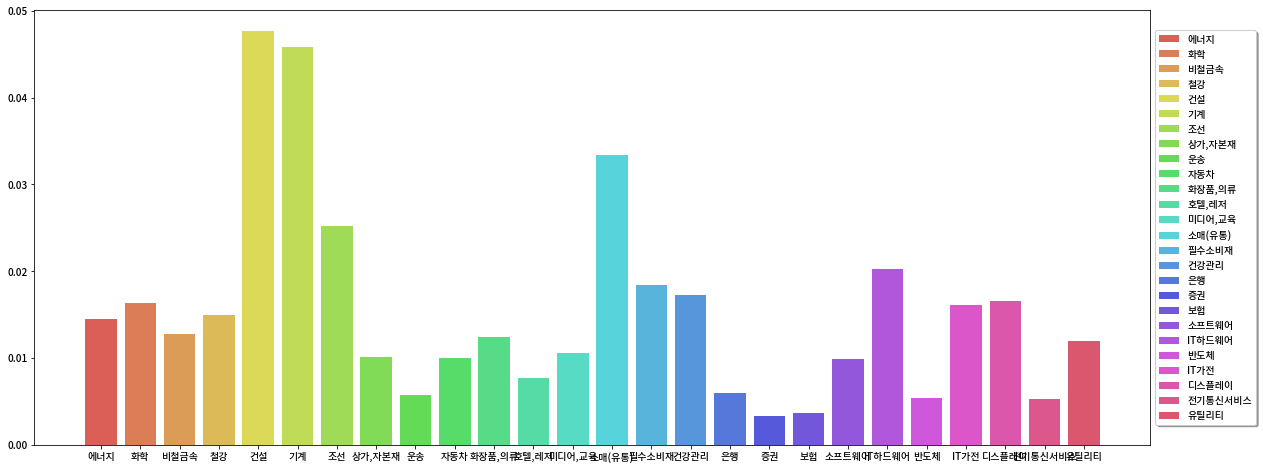

In [39]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(20, 8))
ax = plt.subplot(111)

for i, sector in enumerate(list(sector_dic)):
  ax.bar(sector, (sectors[sector]['거래대금 (백만)']/sectors[sector]['시가총액 (백만)'])[-1], color=colors[i], label=sector)

ax.legend(loc='center left',  bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True)
plt.show()

Sector Momentum

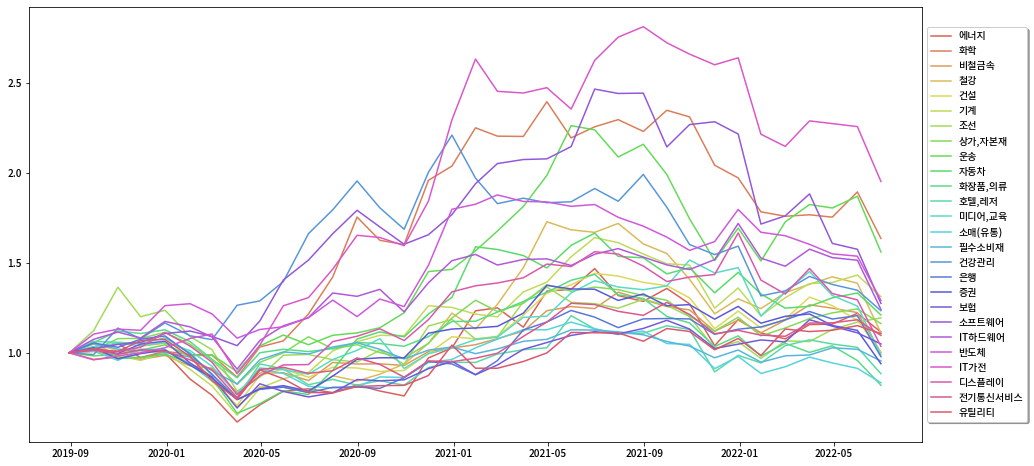

In [37]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(16, 8))
ax = plt.subplot(111)
colors = list(sns.color_palette("hls", len(sector_dic)).as_hex())

for i, sector in enumerate(list(sector_dic)):
  ax.plot(sectors[sector]['지수값']/sectors[sector]['지수값'][0], color=colors[i], label=sector)

ax.legend(loc='center left',  bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True)
plt.show()